# Plot C-M Diagram using HST data  (One file)

* 이 자료는 Hubble Space Telescope (HST)의 WFPC2 측광 자료를 이용하여 C-M diagram을 그리는 교수학습자료이다.

* python3 환경에서 돌아가도록 작성하였다. 

* 이 파일은 읽기 전용으로 공유되어 있기 때문에 [파일] - [드라이브에 사본 저장]을 하여 본인의 소유로 만든 후에 코드를 실행할 수 있다.

* 이 파일은 실제 수업에 사용하므로 필요에 따라 예고 없이 변경될 수 있다.

* If you have any questions or comments on this document, please email me(Kiehyun.Park@gmail.com).

* 이 저작물은 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있다.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

# Required modules : Numpy, Matplotlib

코랩에서는 Numpy, Matplotlib 모두 설치되어 있으므로 그냥 사용하면 된다.

## install version information

 코랩에 version_informatioin을 설치하자.


In [1]:
!pip install version_information

  Created wheel for version-information: filename=version_information-1.0.4-py3-none-any.whl size=3902 sha256=384a8377f3566f4147129dcf2e21c7ac02d58fc4bf6f44af796f7a030ee8fc0d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2f\a3\5a\9a8f175a911488e62feaa0a7653eaefe408a3c9791963240cd
Successfully built version-information


## check version_information

아래의 셀을 실행하여 버전 정보를 확인해 보자.

In [2]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information numpy, matplotlib
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2022-12-16 08:17:11 (대한민국 표준시 = GMT+0900) 
0 Python     3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
1 IPython    8.2.0
2 OS         Windows 10 10.0.22621 SP0
3 numpy      1.21.5
4 matplotlib 3.5.1


# 색-등급도(CMD, color-magnitude diagram)

색등급도(色等級圖, color-magnitude diagram)란 항성천문학에서 절대등급, 광도, 항성분류, 그리고 표면온도의 관계를 나타낸 그래프이다. 그 고안자인 아이나르 헤르츠스프룽과 헨리 노리스 러셀의 이름을 따서 헤르츠스프룽-러셀 도표(영어: Hertzsprung–Russell diagram 헤르츠스프룽-러셀 다이어그램, 문화어: 헤르쯔슈프룽-라쎌도표)라고도 한다. 

헤르츠스프룽-러셀 다이어그램은 크게 두 가지 종류가 있다. 하나는 한 축에 별의 색지수, 분광형, 표면온도를 놓고, 다른 축에 절대등급을 놓은 관측자용 표이다. 각 좌표는 관측으로 얻을 수 있다. (위키백과)

CMD를 그리려면 색지수(color index, CI)와 등급(magnitude)이 필요한데, 색지수는 일반적으로 다음과 같이 구할 수 있다. 

*  ${CI} = M_{B} - M_{V}$

색지수(color index, CI)는 다른 파장으로 구할 수도 있으나, 짧은 파장의 등급에서 긴 파장의 등급을 빼주어야 한다.

#허블 우주 망원경

[허블 우주망원경(영어: Hubble Space Telescope, HST)](https://hubblesite.org/)은 1990년에 지구 저궤도로 발사된 우주망원경으로 현재도 가동 중이다. 허블은 최초의 우주망원경은 아니지만 가장 크고 가장 쓰임이 많은 우주망원경 중 하나이며, 천문학에서 없어서는 안 될 연구 도구이자 대중 관계 구축에 도움을 주는 것으로도 유명하다. 허블의 명칭은 천문학자인 에드윈 허블의 이름에서 본뜬 것으로, 콤프턴 감마선 관찰위성, 찬드라 엑스선 관찰위성, 스피처우주망원경과 함께 NASA의 거대관찰위성 Great Observatories의 일원이다.(위키백과)


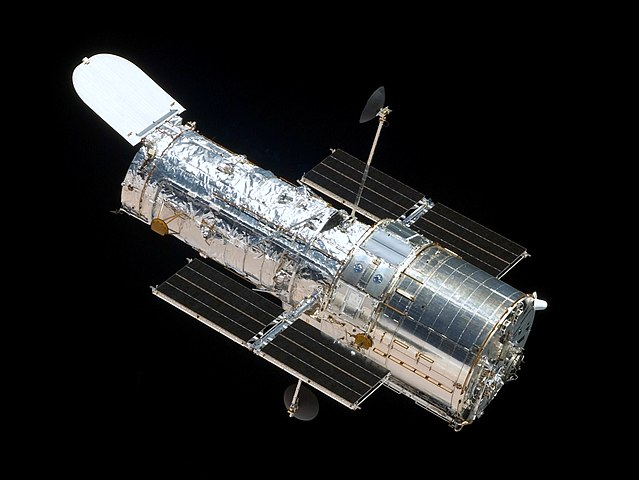

## Hubble Legacy Archive

[Hubble Legacy Archive](http://hla.stsci.edu/)에서 허블 우주 망원경이 관측한 자료들을 배포하고 있다. 접속한 후 "Enter Site here" 를 클릭한다. 

자료 검색 방법을 간략히 소개하면 다음과 같다. 

1. 검색할 천체의 이름 또는 카탈로그 번호를 상단에 입력한다. (ex, M3, M4, M80 등)
2. 검색된 테이블의 각 컬럼에 검색어를 입력하여 자료를 필터링 할 수 있다. 


## 구상성단, 산개성단의 측광자료 다운로드

만약 성단의 측광자료를 다운받고자 한다면 다음과 같이 할 수 있다.

1. 다운받고자 하는 성단 이름을 입력한다. (ex, M80, M3, M13 등)

2. 성단 측광자료 찾기
 - "Detector" column : "WFPC2"
 - 	"Spectral_Elt" : 컬럼에서 관측 파장을 체크한다.
 - "DAOCat" column : DAOPHOT algorithm [Cart 아이콘]이 있으면 틀릭

3. 다운로드 탭으로 이동하여 다운로드 한다.

* 현재 adobe flash 문제로 다운로드 불가

#코랩 작업영역에 데이터 파일 저장

현재 이 구글 코랩의 작업공간에 HST data를 저장할 폴더를 "HST_data" 라는 이름으로 생성해보자. 폴더 생성은 리눅스 shell 명령어로 가능한데, "!"를 붙이면 shell 명령어를 실행할 수 있다.


In [3]:
#내 작업 공간에 쉘명령어를 사용하여 폴더를 만들 수 있다. 
#!를 앞에 붙여주면 shell 명령어를 실행한다. 
!mkdir HST_data
print ("HST_data is created...")

HST_data is created...


���� ���͸� �Ǵ� ���� HST_data��(��) �̹� �ֽ��ϴ�.


역시 shell 명령어로 폴더가 생성되었는지 확인해 보자. 

폴더 생성을 확인하는 또 다른 방법은 이 창 오른쪽에서 [파일] 목록을 확인해 볼 수 있다.

In [5]:
!dir

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: 0AA8-5637

 c:\Users\USER\Desktop\KBox\Github\data_Science_ES ���͸�

2022-12-15  ���� 01:12    <DIR>          .
2022-12-16  ���� 08:16    <DIR>          ..
2022-12-16  ���� 08:17           104,196 02_Plot_C_M_Diagram_using_HST_data_one_file(solution).ipynb
2022-12-15  ���� 10:11    <DIR>          HST_data
2022-12-15  ���� 10:08               840 Untitled.ipynb
               2�� ����             105,036 ����Ʈ
               3�� ���͸�  45,931,847,680 ����Ʈ ����


## wget을 통한 다운로드

[Hubble Legacy Archive](http://hla.stsci.edu/)로 부터 다운받아 나의 구글 드라이브에 저장해 놓은 HST 관측 자료를 wget를 이용하여 여러분의 [작업 영역]에 저장해 두자. 

GNU Wget은 HTTP 통신 또는 FTP 통신을 사용해 서버에서 파일 또는 콘텐츠를 다운로드할 때 사용하는 소프트웨어이다. Wget의 특징은 여러 파일을 한 번에 다운로드하거나 웹 페이지의 링크를 순회하며 여러 콘텐츠를 자동으로 다운로드할 때 매우 편리하다. 

구글 코랩이 wget도 지원해주니 사용하지 않을 이유는 없을것 같다. 아래 셀을 실행하면 자신의 [작업 영역]에 저장되며 이 런타임이 재실행 될때는 삭제됨에 유의하자.


In [6]:
#wget을 이용하여 HST 자료 다운로드
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Zj5QJXLIkER4ko_q3LMruKeK4H8rIHPX' -O HST_data/hst_08679_07_wfpc2_multiwave_wf_daophot_trm.cat

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'id'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


위와 마찬가지로 폴더 생성 여부와 파일 다운로드 여부를 확인하려면 오른쪽의 [파일]창에서 확인할 수 있다. 또한 shell 명령어로 다음과 같이 확인해 볼 수 있다.

In [6]:
!ls -l HST_data

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


##저장된 파일 확인하기

리툭스 셀 명령어 중에서 "head -n 행갯수"를 이용하면 text 파일의 위쪽 지정된 행까지의 내용을 볼 수 있다.

In [7]:
!head -n 100 HST_data/hst_08679_07_wfpc2_multiwave_wf_daophot_trm.cat

'head'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


파일 앞부분에 자료에 대한 설명이 있다. 확인해 보니 HST 이미지로 부터 별들의 밝기를 측정한 측광 결과이다. f606w, f814w 두 파장에 대해 MagAP2, TotMag 컬럼의 자료를 이용하면 CMD를 그려볼 수 있을 것으로 생각된다. 
이 자료에서 별의 ID (1st colomn), 별의 파장별 등급 자료인 MagAP2의 f606w, f814w(6th column, 7th column) 또는 TotMag의 f606w, f814w(8th column, 9th column) 를 이용하면 된다.


# Numpy array로 자료 처리하기

행과 열이 일정한 자료이므로 2차원 배열(np.array)을 이용해 보자. 

Numpy의 loadtxt 함수를 이용하면 위쪽의 자료를 제외하고 쉽게 2차원 배열로 만들어 볼 수 있다. 


In [7]:
import numpy as np

# Load data
base_dr = "HST_data/"
filename = "hst_08679_07_wfpc2_multiwave_wf_daophot_trm.cat"

# NumPy automatically skips the commented rows.
DAO_array = np.loadtxt('{}{}'.format(base_dr, filename))

print("type(DAO_array): {}".format(type(DAO_array)))

OSError: HST_data/hst_08679_07_wfpc2_multiwave_wf_daophot_trm.cat not found.

## 객체에 사용할 수 있는 함수 확인하기

DAO_array라는 이름의 numpy.ndarray가 생성되었으니 이 객체에 사용할 수 있는 함수를 확인해 보자.


In [ ]:
dir(DAO_array)

## 객체 출력해 보기

2차원 배열의 크기도 확인해 볼 수 있고, print 문으로 객체의 내용을 볼 수 있다.

In [ ]:
print("DAO_array.shape: {}".format(DAO_array.shape))
print("DAO_array:\n {}".format(DAO_array))

# Processing data

CMD를 그리기려면 색지수(color index, CI)와 등급(magnitude)이 필요하다. 색지수는 다음과 같이 구할 수 있다. 

*  ${CI} = M_{F606} - M_{F814}$

별의 등급은 둘 중 가시광선 영역인 $606 \rm{~nm}$의 등급을 이용하자.
*  $\rm{Magnitude} = M_{606}$

다운받은 자료에서 별의 파장별 등급 Magnitude f606w, f814w(6th column, 7th column)를 이용하면 된다.


## 2차원 numpy array slicing

2차원 배열인 DAO_array에서 특정 행이나, 특정 컬럼만 슬라이싱 하는 방법은 다음과 같다.

In [ ]:
# 행 방향 슬라이싱
print("DAO_array[1, :]: {}".format(DAO_array[1, :]))

# 열 방향 슬라이싱
print("DAO_array[:, 1]: {}".format(DAO_array[:, 1]))

## (과제)

2차원 배열인 DAO_array에서 f606w(6th column)만 화면에 출력해 보자.

In [ ]:
#(과제) 이곳에 코딩을 완성하여 제출하시오.

print("DAO_array[:,5]:\n {}".format(DAO_array[:,5]))

## 색지수 구하기

짧은 파장의 등급에서 긴파장의 등급을 빼주면 색지수를 구할 수 있다. 

##(과제)

2차원 배열인 DAO_array로 부터 별들의 색지수를 구하여 배열로 반환하는 코드를 작성해 보자.

In [ ]:
#(과제) 이곳에 코딩을 완성하여 제출하시오.
print("CI:\n {}".format(DAO_array[:,5]-DAO_array[:,6]))

## CMD 그리기

matplotlib를 이용하여 위에서 구한 색지수와 등급 자료로 CMD를 그려보자.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plot CMD
plt.plot(DAO_array[:,5]-DAO_array[:,6], DAO_array[:,5], 'o', ms=2, alpha=0.2)

# 등급의 축은 반대로
plt.gca().invert_yaxis()

#show the Diagram
plt.show()

뭔가 이상하다. 가로축을 보니 색지수가 1000이 넘는 자료가 있다. 아마 데이터에 문제가 있는 것같다. DAO_array에 들어 있는 데이터를 확인해 보자.

In [ ]:
print("DAO_array[:,5].min(): {}".format(DAO_array[:,5].min()))
print("DAO_array[:,5].max(): {}".format(DAO_array[:,5].max()))
print("DAO_array[:,6].min(): {}".format(DAO_array[:,6].min()))
print("DAO_array[:,6].max(): {}".format(DAO_array[:,6].max()))
print("DAO_array[:,7].min(): {}".format(DAO_array[:,7].min()))
print("DAO_array[:,7].max(): {}".format(DAO_array[:,7].max()))
print("DAO_array[:,8].min(): {}".format(DAO_array[:,8].min()))
print("DAO_array[:,8].max(): {}".format(DAO_array[:,8].max()))

아마 측정에 에러가 있는 경우 "-999"로 저장을 해 둔 것 같다. 이 "-999" 값을 지워야 할 것 같다. 

## 마스킹 방법

"-999" 자료를 제거하기 위하여 bool data type을 이용해 마스킹 하는 방법을 익혀 보자.

In [ ]:
import numpy as np

num1 = np.arange(0, 11, 2) # generate numpy array [0, 11) with interval 2
print("num1's elements:\n {}".format(num1))

# MASKING
tf   = np.array([False, True, False, True, True, False])

print("tf:\n {}".format(tf))

print("num1's selected elements:\n {}".format(num1[tf]))

## -999인 자료 마스킹

실제 자료에 적용할 때는 다음과 같이 for ~ loop문을 이용해 볼 수 있을 것이다. 

In [ ]:
# get CI value and masking 
mask  = np.zeros(len(DAO_array)).astype(bool)

# check "-999" data
for i in range(0, len(DAO_array)):
    if DAO_array[i, 5] == -999 or DAO_array[i, 6] == -999 \
        or DAO_array[i, 7] == -999 or DAO_array[i, 8] == -999 \
        or DAO_array[i, 9] == -999 or DAO_array[i, 10] == -999:
    #if DAO_array[i, 5:9].any == -999 :
        mask[i]  = False
    else :
        mask[i]  = True

# CMD 그려서 확인하기

matplotlib 모듈로 CMD를 그려보자.
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plot CMD
plt.plot(DAO_array[mask,5]-DAO_array[mask,6], DAO_array[mask,5], 'o', ms=2, alpha=0.2)

# 등급의 축은 반대로
plt.gca().invert_yaxis()

#show the Diagram
plt.show()

## CMD 꾸미기

ch1, ch2, object_name 등을 변수로 설정하여 CMD 그려고, 축제목 등을 꾸며보자.

In [ ]:
import numpy as np

ch1, ch2 = "F606", "F814"
data_type  = "WFPC2 MagAP2"
object_name = 'M4'

#plot CMD
import matplotlib.pyplot as plt

#차트 크기 설정
fig, ax = plt.subplots(figsize=(10.5,8))

ax.plot(DAO_array[mask,5]-DAO_array[mask,6], DAO_array[mask,5], 'o', ms=2, alpha=0.2)

# Y축 제목
ax.set_xlabel('Color Index ({} - {})'.format(ch1, ch2), fontdict={'fontsize':14})
ax.set_ylabel('Magnitude ({})'.format(ch1), fontdict={'fontsize':14})

# 차트 제목 폰트 크기 크게
ax.set_title('C-M diagram of {} ({})'.format(object_name, data_type),
             fontdict={'fontsize':16})

ax.grid()
plt.gca().invert_yaxis()

plt.annotate('created by guitar79@gs.hs.kr\n using The Hubble space telescope data',
        xy=(1, 0), xytext=(0, -50), va='top', ha='right',
        xycoords='axes fraction', textcoords='offset points')

plt.savefig("{}{}_{}_CMD.png"\
    .format(base_dr, filename[:-4], data_type), overwrite=True)
print("{}{}_CMD.png is created..."\
    .format(base_dr, filename[:-4], data_type))

#show the Diagram
plt.show()

## Total magnitude 이용하여 비교하기기

자료 중에는 AP2가 있고, Total magitude 자료가 있다.
둘을 이용하여 각각 그려서 비교해 보자.

In [ ]:
import numpy as np

ch1, ch2 = "F606", "F814"
data_type1  = "WFPC2 MagAP2"
data_type2  = "WFPC2 TotMag"
object_name = 'M4'

# check "-999" data
for i in range(0, len(DAO_array)):
    if DAO_array[i, 5] == -999 or DAO_array[i, 6] == -999 \
        or DAO_array[i, 7] == -999 or DAO_array[i, 8] == -999 :
        mask[i]  = False
    else :
        mask[i]  = True


#plot CMD
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# chart 
ax1.plot(DAO_array[mask,5] - DAO_array[mask,6], DAO_array[mask,5], 'o', ms=2, alpha=0.2)
ax2.plot(DAO_array[mask,7] - DAO_array[mask,8], DAO_array[mask,7], 'o', ms=2, alpha=0.2)

# 축 제목
ax1.set_xlabel('Color Index ({} - {})'.format(ch1, ch2), fontdict={'fontsize':14})
ax1.set_ylabel('Magnitude ({})'.format(ch1), fontdict={'fontsize':14})
ax1.set_xlabel('Color Index ({} - {})'.format(ch1, ch2), fontdict={'fontsize':14})
ax2.set_ylabel('Magnitude ({})'.format(ch1), fontdict={'fontsize':14})
ax1.invert_yaxis()
ax2.invert_yaxis()
ax1.grid()
ax2.grid()

# 차트 제목 폰트 크기 크게
ax1.set_title('C-M diagram of {} ({})'.format(object_name, data_type1),
             fontdict={'fontsize':16})
ax2.set_title('C-M diagram of {} ({})'.format(object_name, data_type2),
             fontdict={'fontsize':16})


plt.annotate('created by guitar79@gs.hs.kr\n using The Hubble space telescope data',
        xy=(1, 0), xytext=(0, -50), va='top', ha='right',
        xycoords='axes fraction', textcoords='offset points')

plt.savefig("{}{}_{}_{}_CMD.png"\
    .format(base_dr, filename[:-4], data_type1, data_type2), overwrite=True)
print("{}{}_{}_{}_CMD.png"\
    .format(base_dr, filename[:-4], data_type1, data_type2))

#show the Diagram
plt.show()